<a href="https://colab.research.google.com/github/janasmoore/datasciencecoursera-repo/blob/master/JanaMooreD213_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Jana Moore**

**D213 Task #2**

Western Governors University

MSDS July 2023

---

# Part I:  Research Question
1. Can we understand customer satisfaction with the product they purchased by their word choices in their review?
2. The goal of the analysis is to use natural language processesing techniques to analyze the customers word choice in their review of the product they purchuased. We wish to determine if the customers sentiment was either positive or negative within their reviews.
3. We will do this using TensorFlow neural networks for this analysis.

In [53]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
from keras.layers import *
from keras.preprocessing import sequence
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
porter = PorterStemmer()
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.model_selection import train_test_split


In [2]:
# Import data
# Data was recieved from professor with review and rating already in correct formatitng
Review = pd.read_csv('Review')
Review.head()

,Review,Rating
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


# Part II: Data Preparation
B.  Summarize the data cleaning process by doing the following:

1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:

> *    Presence of unusual characters (e.g., emojis, non-English characters, etc.)
*   Vocabulary size
* Proposed word embedding length
* Statistical justification. for the chosen maximium sequence length

2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:

> * if the padding occurs before or after the text sequence
* a screenshot of a single padded sequence

4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.

5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.

6.  Provide a copy of the prepared dataset.


# Prepare the data

In [3]:
# Review the summary of the data set
Review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Rating  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [4]:
# Add two columns to the data set to find the number of words and characters in each review
Review['Words'] = [len(x.split()) for x in Review['Review'].tolist()]
Review['Char'] = Review['Review'].apply(len)
Review.head()

,Review,Rating,Words,Char
0,So there is no way for me to plug it in here i...,0,21,82
1,"Good case, Excellent value.",1,4,27
2,Great for the jawbone.,1,4,22
3,Tied to charger for conversations lasting more...,0,11,79
4,The mic is great.,1,4,17


In [5]:
# lowercase all the reviews
Review['Review'] = Review['Review'].str.lower()
Review.head()

,Review,Rating,Words,Char
0,so there is no way for me to plug it in here i...,0,21,82
1,"good case, excellent value.",1,4,27
2,great for the jawbone.,1,4,22
3,tied to charger for conversations lasting more...,0,11,79
4,the mic is great.,1,4,17


In [6]:
# Remove punctuation
punc = re.compile(r'[^\w\s]+')
Review['Review'] = [punc.sub('', x) for x in Review['Review'].tolist()]
Review.head()

,Review,Rating,Words,Char
0,so there is no way for me to plug it in here i...,0,21,82
1,good case excellent value,1,4,27
2,great for the jawbone,1,4,22
3,tied to charger for conversations lasting more...,0,11,79
4,the mic is great,1,4,17


# Exploratory Data Anaysis
To explore the data, generate a word cloud to view the most prominenet words. We also generate a histogram of the word and character count distributions.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


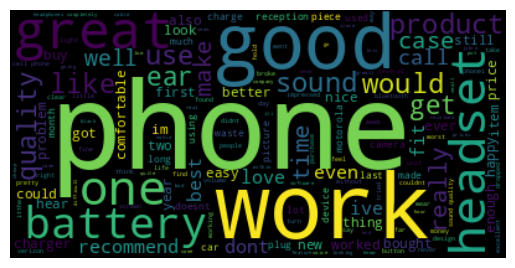

In [8]:
from IPython.lib.display import join
# Word cloud
import nltk
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.update(['br','href'])
textt = "".join(Review for Review in Review.Review)
wordcloud = WordCloud(stopwords = stopwords).generate(textt)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.savefig('wordcloud_1.png')
plt.show()

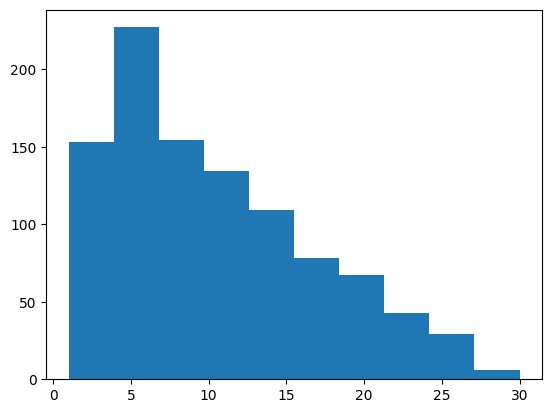

In [9]:
plt.hist(Review['Words'])
plt.show()

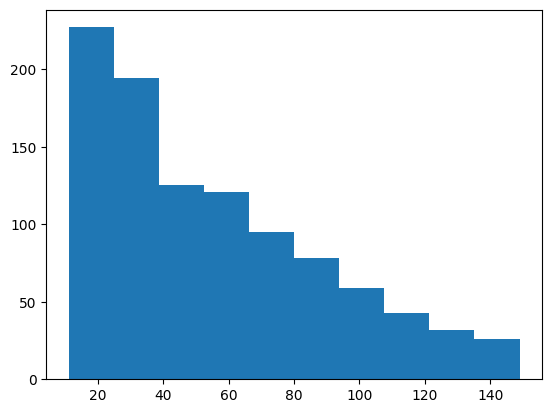

In [10]:
plt.hist(Review['Char'])
plt.show()

# Goals of the tokenization process & vocabulary size
The goal of the tokenization process is to separate text into smaller chunks. For this project we will use our tokens (chunks) as words in the reivews. The words will be indexed with a number which can then be vectorized and usable in a TensorFlow model.

We start by checking the vocabulary size. The total word count for the tokenized word index is 1798.

During this process we also vectorize the data using the texts_to_sequences command from the tokenizer package.


In [11]:
# vocabulary size
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))

Review_tk = []
for sentance in Review.Review:
  Review_tk.append([word for word in word_tokenize(sentance) if word not in stopwords])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
vocabulary = 50000
x = Review_tk
print('''\n''',x)
tokenizer = Tokenizer(num_words = vocabulary)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)
print('''\n''',x)


 [['way', 'plug', 'us', 'unless', 'go', 'converter'], ['good', 'case', 'excellent', 'value'], ['great', 'jawbone'], ['tied', 'charger', 'conversations', 'lasting', '45', 'minutesmajor', 'problems'], ['mic', 'great'], ['jiggle', 'plug', 'get', 'line', 'right', 'get', 'decent', 'volume'], ['several', 'dozen', 'several', 'hundred', 'contacts', 'imagine', 'fun', 'sending', 'one', 'one'], ['razr', 'owneryou', 'must'], ['needless', 'say', 'wasted', 'money'], ['waste', 'money', 'time'], ['sound', 'quality', 'great'], ['impressed', 'going', 'original', 'battery', 'extended', 'battery'], ['two', 'seperated', 'mere', '5', 'ft', 'started', 'notice', 'excessive', 'static', 'garbled', 'sound', 'headset'], ['good', 'quality', 'though'], ['design', 'odd', 'ear', 'clip', 'comfortable'], ['highly', 'recommend', 'one', 'blue', 'tooth', 'phone'], ['advise', 'everyone', 'fooled'], ['far', 'good'], ['works', 'great'], ['clicks', 'place', 'way', 'makes', 'wonder', 'long', 'mechanism', 'would', 'last'], ['w

In [13]:
print(tokenizer.word_index)

{'phone': 1, 'great': 2, 'good': 3, 'product': 4, 'quality': 5, 'headset': 6, 'works': 7, 'battery': 8, 'sound': 9, 'use': 10, 'one': 11, 'well': 12, 'ear': 13, 'would': 14, 'work': 15, 'dont': 16, 'like': 17, 'case': 18, 'ive': 19, 'excellent': 20, 'time': 21, 'price': 22, 'recommend': 23, 'really': 24, 'im': 25, 'best': 26, 'service': 27, 'get': 28, 'nice': 29, 'also': 30, '2': 31, 'new': 32, 'love': 33, 'worked': 34, 'charger': 35, 'money': 36, 'buy': 37, 'item': 38, 'better': 39, 'ever': 40, 'car': 41, 'even': 42, 'comfortable': 43, 'bought': 44, 'first': 45, 'bluetooth': 46, 'easy': 47, 'could': 48, 'doesnt': 49, 'used': 50, 'poor': 51, 'happy': 52, 'reception': 53, 'waste': 54, 'two': 55, 'made': 56, 'still': 57, 'bad': 58, 'purchase': 59, 'cell': 60, 'worst': 61, 'far': 62, 'charge': 63, 'fine': 64, 'calls': 65, 'enough': 66, 'thing': 67, 'device': 68, 'piece': 69, 'got': 70, 'problems': 71, 'right': 72, 'volume': 73, 'long': 74, 'problem': 75, 'hear': 76, 'make': 77, 'life': 78

# Word Embedding and Max Sequence Length
Next we explore the data summaries for the words and character columns of our data set. The maximum number of words in the reviews is 30, and a max character of 149.

Embedding size determines that each word will be represented by an n-dimensional vector. [1]

The max sequence length we will use is the max word count in the reivew column. The statistical justification for using max word count for sequence length is that doing so preserves the avaliable data in the data set.



In [14]:
Review['Words'].describe()

count    1000.000000
mean       10.246000
std         6.687616
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        30.000000
Name: Words, dtype: float64

In [15]:
Review['Char'].describe()

count    1000.000000
mean       55.226000
std        34.653482
min        11.000000
25%        26.000000
50%        48.000000
75%        77.000000
max       149.000000
Name: Char, dtype: float64

In [41]:
1798**(1/2)

42.40283009422838

# Padding Process
Padding is used in Neural Networks to preserve the shape of the tensor dimensions in order to improve preformance. Each entry in the network must be the same size. Given that there is a wide range of word counts in the reviews, we must add "padding" after the data entries with less than 30 words to keep the dimensions of each sentance size in the reviews the same.   

In [17]:
max_length = 30
x = pad_sequences(x, maxlen = max_length, padding = 'post', truncating = 'post')
print(x.shape)

(1000, 30)


In [18]:
print(x)

[[ 134   84  441 ...    0    0    0]
 [   3   18   20 ...    0    0    0]
 [   2  315    0 ...    0    0    0]
 ...
 [  38  348  160 ...    0    0    0]
 [  67 1794 1795 ...    0    0    0]
 [1798   65  132 ...    0    0    0]]


# Number of Categories of Sentiment and Activation Function for the Final Dense Layer of the Network
For this project we will use 2 categories of sentiment; positive or negative denoted by the 1 or 0 in the original data set. For this project we are using the Keras sequential model. The activation function for the final dense layer of the network we will use is the ReLU function.

# Data preparation for Network Model
explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.


Here we explain the steps used to prepare the data for analysis. So far, we have removed special characters, punctuation, and removed stopwords to clean up the data. We identified the maximum sequence length as 30, which is the maximum number of words in all reviews. We transformed the data into a sequence of numbers using the tokenized index of words used in the reviews. After sequencing, we then padded the data with trailing zeros so every sequenced review has the same length. Next we will split the data into training, validation and test sets. For this analysis we use a 75/25 split.


In [19]:
# Define y for test train split
y = Review['Rating']
print(y)

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Rating, Length: 1000, dtype: int64


In [20]:
# Preform test train split.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [21]:
print(x_train, '\n\n', x_test,'\n\n', y_train, '\n\n', y_test)

[[  12  342  199 ...    0    0    0]
 [1788   13    0 ...    0    0    0]
 [ 152   10   18 ...    0    0    0]
 ...
 [ 112   21  289 ...    0    0    0]
 [ 594  176  303 ...    0    0    0]
 [ 202  267    0 ...    0    0    0]] 

 [[1200  111  625 ...    0    0    0]
 [1523  611  612 ...    0    0    0]
 [  14   99   23 ...    0    0    0]
 ...
 [   2  115   38 ...    0    0    0]
 [  38   34    2 ...    0    0    0]
 [ 521   23  289 ...    0    0    0]] 

 82     1
991    0
789    0
894    0
398    1
      ..
106    0
270    0
860    0
435    0
102    1
Name: Rating, Length: 750, dtype: int64 

 521    1
737    1
740    1
660    0
411    1
      ..
109    0
430    1
77     1
84     0
286    0
Name: Rating, Length: 250, dtype: int64


In [22]:
print(x_train.shape, x_test.shape,y_train.shape,y_test.shape)

(750, 30) (250, 30) (750,) (250,)


# Export the data
Now that we have cleaned the data, we export it to a csv file for attachement to the project submission.

In [26]:
x_train_df = pd.DataFrame(x_train)
x_test_df = pd.DataFrame(x_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [27]:
Review.to_csv('Review_clean.csv')
x_train_df.to_csv('x_train_df.csv')
x_test_df.to_csv('x_test_df.csv')
y_train_df.to_csv('y_train_df.csv')
y_test_df.to_csv('y_test_df.csv')

# Part III:  Network Architecture

C.  Describe the type of network used by doing the following:

1.  Provide the output of the model summary of the function from TensorFlow.

2.  Discuss the number of layers, the type of layers, and total number of parameters.

3.  Justify the choice of hyperparameters, including the following elements:
>>
- Activation functions
>
- Number of nodes per layer
>
- Loss function
>
- Optimizer
>
- Stopping criteria
>
- Evaluation metric

# Layers and Parameters
First we create the model. The first layer is the embedding layer. The parameters used are the vocabulary size of 50000, an embedding dimension of 30, and the max length of 30. The second layer of the networks is GlobalAveragePooling1D. This flattens the vetor to 2 dimensions to 3 dimensions.[1] The third layer is the Dense layer, aslo known as the hidden layer, using the ReLU actication function with a density unit of 15. The fourth layer is another dense layer with ReLU activation function and density unit of 5. A final 5th layer  is also a dense layer with ReLU actication function and density unit of 1.


In [42]:
vocab_size = 5000
embedding_dim = 30
max_length = 30

In [43]:
# Creating model
# Code citation [1]
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [44]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Justification for the choice of hyperparameters
- **Activation Function:**  The acivation function used in this model is the ReLU function. The ReLU (rectified linear unit) funtion is a ridge function. [2] A ridge function is not subject the the "curse of dimensionality" where when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. [3][4]

- **Number of Nodes Per Layer:** The number of layers was chosen as 4 becuase with the data having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used. The number of nodes per layer was selected by using a sequentially lower number than the embedding layer. Several iterations of numbers was used in order to select values that optimize the algorithim without immediatly apparent overfitting. [5]

- **Loss Function:** The loss function we chose for this model is the binary_crossentropy. This loss function is a probabilistic loss with a binary output. Since we want a "positive or negative" output, this loss function is appropriate.[1]

- **Optimizer:** The optimizer we used in this project is the "Adam" optimizer. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.[6] Mathematically, a moments of a function provide quantitative measures related to the shape of the function's graph. [7]

- **Stopping Criteria:** The stopping criteria we will use is called Callback. A callback is a powerful tool to customize the behavior of a Keras model during training, evaluation, or inference. [8]

- **Evaluation Metric:** The evaluation metric we used for this analysis is the accuracy and mean absolute error. We use training and validation accuracy to identify the efficacy of the model by optimizing the accuracy value within the confines of the stopping criteria. We also use Mean Abosulte Error to measure the average size of the prediction mistakes within each eopch.



# Model Summary and Output
The model summary is shown below. The output includes the model type of "sequential" with the golbal average pooing function, and three density layers. First we train and test the model using 20 epochs and no stopping criteria. The model output provides a 0.9972 training accuracy and a 0.8160 validation accuracy. We train and test the model using 20 epochs and a stopping critiera callback of "EarlyStopping" to prevent overfitting. The callback stops the model at 7 epochs. The model output using callback provides a 0.9987 training accuracy value and a validation accuracy of 0.8320.

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 30, 30)            150000    
                                                                 
 global_average_pooling1d_3   (None, 30)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_9 (Dense)             (None, 15)                465       
                                                                 
 dense_10 (Dense)            (None, 5)                 80        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 150,551
Trainable params: 150,551
Non-trainable params: 0
________________________________________________

In [72]:
# Traing and testing the model
num_epochs = 20
Model1 = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))

Epoch 1/20
24/24 [==============================] - 0s 7ms/step - loss: 0.0072 - accuracy: 0.9947 - val_loss: 1.1833 - val_accuracy: 0.8120
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 1.2606 - val_accuracy: 0.8240
Epoch 3/20
24/24 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.9973 - val_loss: 1.3672 - val_accuracy: 0.8320
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9960 - val_loss: 1.2287 - val_accuracy: 0.8240
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0066 - accuracy: 0.9973 - val_loss: 1.2594 - val_accuracy: 0.8200
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.9973 - val_loss: 1.3553 - val_accuracy: 0.8280
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.9947 - val_loss: 1.4257 - val_accuracy: 0.8320
Epoch 8/20
24/24 [==

In [62]:
# Traing and testing the model using callback
# Code citation [8]
num_epochs = 20
callback = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)
Model2 = model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test),callbacks=[callback])

Epoch 1/20
24/24 [==============================] - 0s 20ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 1.3036 - val_accuracy: 0.8280
Epoch 2/20
24/24 [==============================] - 0s 17ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 1.2172 - val_accuracy: 0.8120
Epoch 3/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0056 - accuracy: 0.9973 - val_loss: 1.3913 - val_accuracy: 0.8320
Epoch 4/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 1.2185 - val_accuracy: 0.8160
Epoch 5/20
24/24 [==============================] - 0s 13ms/step - loss: 0.0068 - accuracy: 0.9960 - val_loss: 1.2294 - val_accuracy: 0.8160
Epoch 6/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 1.2733 - val_accuracy: 0.8280
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 1.4092 - val_accuracy: 0.8320


# Part IV:  Model Evaluation

D.  Evaluate the model training process and its relevant outcomes by doing the following:

1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.

2.  Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.

3.  Assess the fitness of the model and any measures taken to address overfitting.

4.  Discuss the predictive accuracy of the trained network.

# Impact of using stopping criteria
During this analysis we generated two model versions. The first model, run without sopping criteria and completing all 20 epochs, had a lower accuracy in both training and validation. The second model, which was generated using callbacks, produced a higher accuracy in both training and validation while only using 7 of the epochs. The impact of using the stopping criteria was a reduction in processing power requirements and a higher accuracy within the chosen model.

# Model training visualizations
Below are the visualizations of both trained models. The first set of graphs shows the training process and MAE for the first model with 20 epochs. The second set of graphs show the training process and MAE for the second model with 7 epochs due to the stopping critiera.

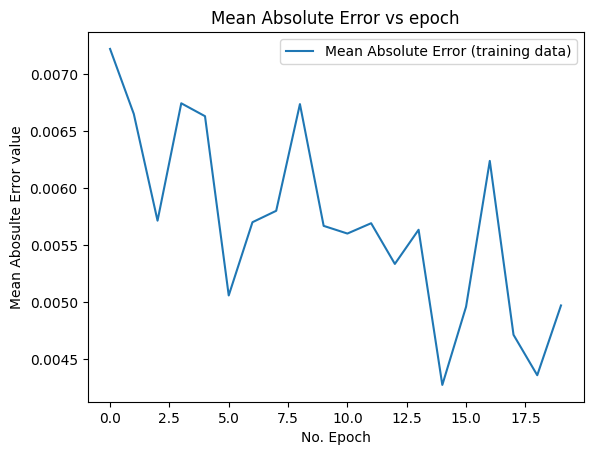

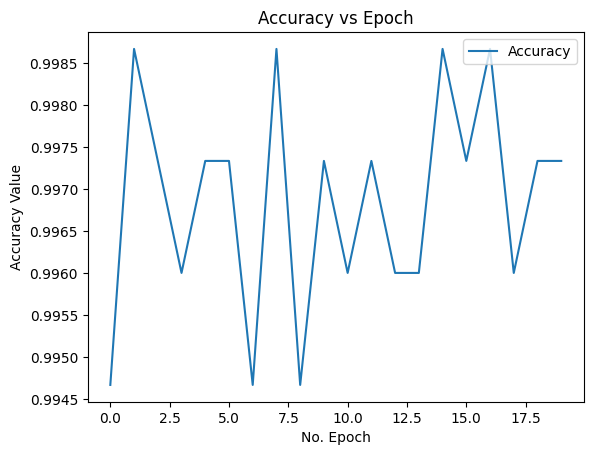

<Figure size 640x480 with 0 Axes>

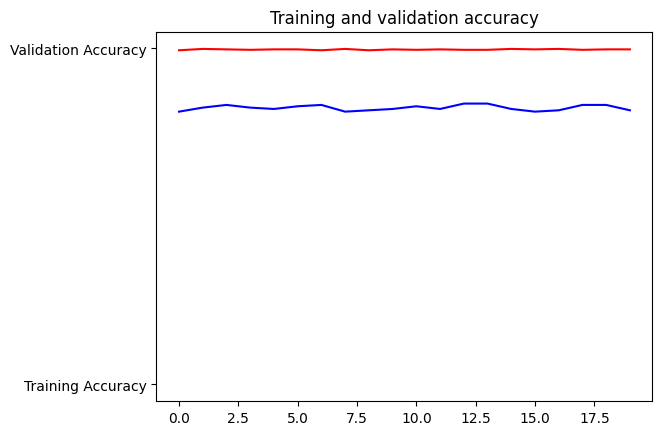

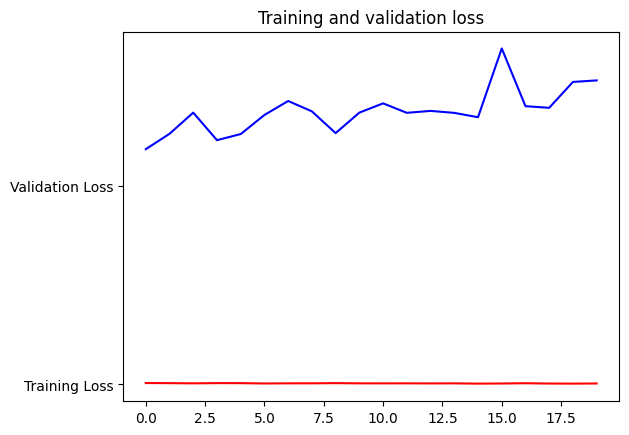

<Figure size 640x480 with 0 Axes>

In [73]:
# mean abolsute error, accuracy, and training vs validation plots Model1
%matplotlib inline
plt.plot(Model1.history['loss'], label='Mean Absolute Error (training data)')
plt.title('Mean Absolute Error vs epoch')
plt.ylabel('Mean Abosulte Error value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
plt.plot(Model1.history['accuracy'], label='Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy Value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
acc = Model1.history['accuracy']
val_acc = Model1.history['val_accuracy']
loss = Model1.history['loss']
val_loss = Model1.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

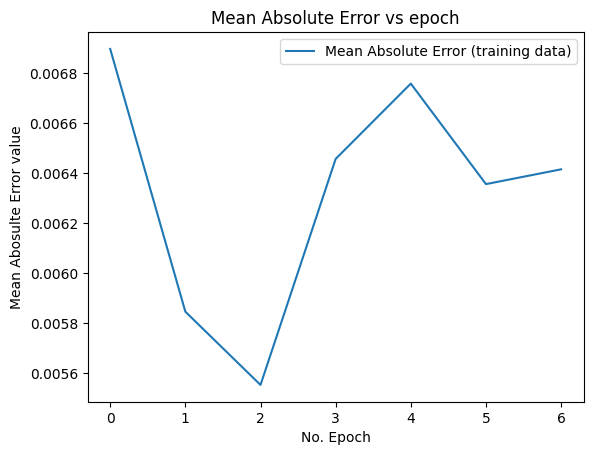

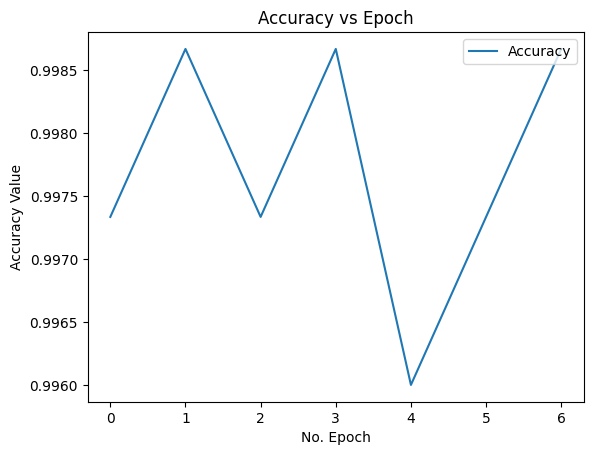

<Figure size 640x480 with 0 Axes>

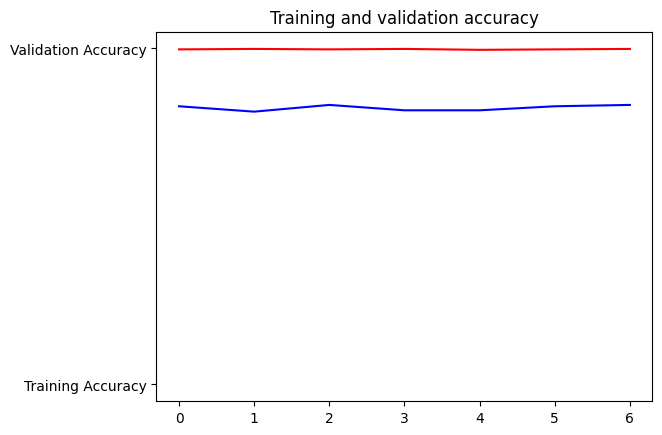

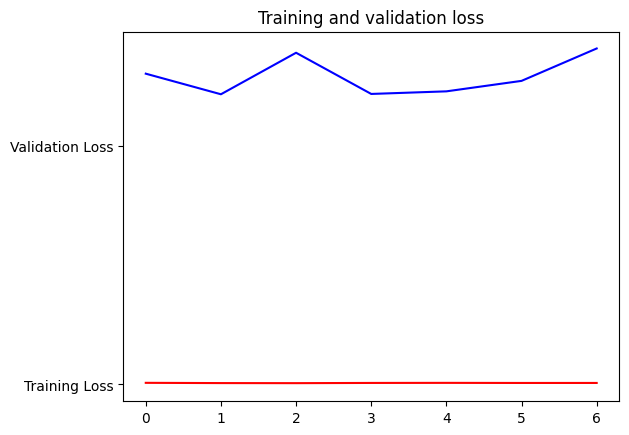

<Figure size 640x480 with 0 Axes>

In [71]:
# mean abolsute error, accuracy, and training vs validation plots Model2
%matplotlib inline
plt.plot(Model2.history['loss'], label='Mean Absolute Error (training data)')
plt.title('Mean Absolute Error vs epoch')
plt.ylabel('Mean Abosulte Error value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
plt.plot(Model2.history['accuracy'], label='Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylabel('Accuracy Value')
plt.xlabel('No. Epoch')
plt.legend(loc="upper right")
plt.show()
acc = Model2.history['accuracy']
val_acc = Model2.history['val_accuracy']
loss = Model2.history['loss']
val_loss = Model2.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

# Model fitness and overfitting
The stopping criteria was used to address and help prevent overfitting. An 83% validation accuracy is likely to not be overfit. An overfit model run on additional data inputs would likely provide erronous results for the sentiment of each review.

# Predictive accuracy of the trained network
The model fitness is predicting with 83% accuracy the sentiment of the reviews. This accuracy provides a level of confidence in the outcome to be reflective of the actual sentiment of the review, either positive or negative.

# Part V:  Summary and Recommendations

- **Provide the code used to save the trained network within the neural network**
> The code used to generate and save this neural network is attached with this sumbission.

- **Discuss the functionality of your neural network, including the impact of the network architecture**
> This neural network has satisfactory accuracy of around 83%, meaning there is 83% correctly predicted positive or negative sentiment based on the words written in the customers review. The network architechture effects its accuracy. Where we could run more epochs, we found that the accuracy decreases over more epochs. Including stopping critera to prevent overfitting and optimizing the model outcome is essential.

- **Recommend a course of action based on your results**
> Understanding customer staisfaction allows a company to make changes in its products, product offerings, incentivize repeat purchuases, and maximize customer satisfaction. A course of action a company could take leveraging this sentiment analysis is provide discount coupons on other products the company carries for those customers who were dissatisifed with their prodcut. This would allow the company to provide an alternative product to the customer that may be more tailored to their needs or wants, and thus changing the outcome of that customers outlook on the company.

# References
[1] Sucky, R. N. (2021, July 8). A Complete Step by Step Tutorial on Sentiment Analysis in Keras and Tensorflow. Medium. https://towardsdatascience.com/a-complete-step-by-step-tutorial-on-sentiment-analysis-in-keras-and-tensorflow-ea420cc8913f

‌[2] Wikipedia Contributors. (2018, November 30). Activation function. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Activation_function

‌[3] Ridge function. (2022, November 9). Wikipedia. https://en.wikipedia.org/wiki/Ridge_function

‌[4] Wikipedia Contributors. (2019, December 8). Curse of dimensionality. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/Curse_of_dimensionality

‌[5] Choosing number of Hidden Layers and number of hidden neurons in Neural Networks. (n.d.). Www.linkedin.com. https://www.linkedin.com/pulse/choosing-number-hidden-layers-neurons-neural-networks-sachdev/

‌[6] Team, K. (n.d.). Keras documentation: Adam. Keras.io. https://keras.io/api/optimizers/adam/

[7] Moment (mathematics). (2023, June 17). Wikipedia. https://en.wikipedia.org/wiki/Moment_(mathematics)


[8] Goswami, D. S. (2020, August 10). Introduction to Early Stopping: an effective tool to regularize neural nets. Medium. https://towardsdatascience.com/early-stopping-a-cool-strategy-to-regularize-neural-networks-bfdeca6d722e


[] Team, K. (n.d.). Keras documentation: The Sequential model. Keras.io. Retrieved July 23, 2023, from https://keras.io/guides/sequential_model/#creating-a-sequential-model

‌